In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta
from scipy import stats
from scipy.stats import jarque_bera, shapiro
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [114]:
train = pd.read_csv('/Users/harshitagarwal/Desktop/Kaggle Competitions/Diabetes Prediction Challenge/playground-series-s5e12/train.csv')

In [115]:
train.shape

(700000, 26)

In [116]:
train.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [117]:
train.describe()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,349999.500000,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,70.167749,186.818801,53.823214,102.905854,123.081850,0.149401,0.181990,0.030324,0.623296
std,202072.738554,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,6.938722,16.730832,8.266545,19.022416,24.739397,0.356484,0.385837,0.171478,0.484560
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,174999.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,349999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,524999.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,699999.000000,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,104.000000,101.000000,289.000000,90.000000,205.000000,290.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

# Target Analysis

In [119]:
def analyze_target_variable(df):
    
    col = 'diagnosed_diabetes'
    data = df[col].dropna()

    # --- Summary stats ---
    print(f"\n📊 {col.upper()} Statistics:")
    print(f"Count: {len(data):,}")
    print(f"Mean: {data.mean():.6f}")
    print(f"Std: {data.std():.6f}")
    print(f"Min: {data.min():.6f}")
    print(f"25%: {data.quantile(0.25):.6f}")
    print(f"50% (Median): {data.median():.6f}")
    print(f"75%: {data.quantile(0.75):.6f}")
    print(f"Max: {data.max():.6f}")
    print(f"Skewness: {data.skew():.6f}")
    print(f"Kurtosis: {data.kurtosis():.6f}")

    fig, axes = plt.subplots(2, 1, figsize=(20, 15))

    # --- Histogram ---
    axes[0].hist(data, bins=3, alpha=0.7, density=True)
    axes[0].axvline(data.mean(), linestyle='--', label=f'Mean: {data.mean():.4f}')
    axes[0].axvline(data.median(), linestyle='--', label=f'Median: {data.median():.4f}')
    axes[0].set_title(f'{col} Distribution')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Density')
    axes[0].legend()

    # --- Q-Q plot ---
    stats.probplot(data, dist='norm', plot=axes[1])
    axes[1].set_title(f'{col} Q-Q Plot')

    # --- Jarque-Bera test ---
    jb_stat, jb_pvalue = jarque_bera(data)
    print(f"Jarque-Bera test statistic: {jb_stat:.4f}")
    print(f"Jarque-Bera test p-value: {jb_pvalue:.4f} "
          f"({'Normal' if jb_pvalue > 0.05 else 'Not Normal'})")

    plt.tight_layout()
    plt.show()

    return col



📊 DIAGNOSED_DIABETES Statistics:
Count: 700,000
Mean: 0.623296
Std: 0.484560
Min: 0.000000
25%: 0.000000
50% (Median): 1.000000
75%: 1.000000
Max: 1.000000
Skewness: -0.508899
Kurtosis: -1.741027
Jarque-Bera test statistic: 118622.8489
Jarque-Bera test p-value: 0.0000 (Not Normal)


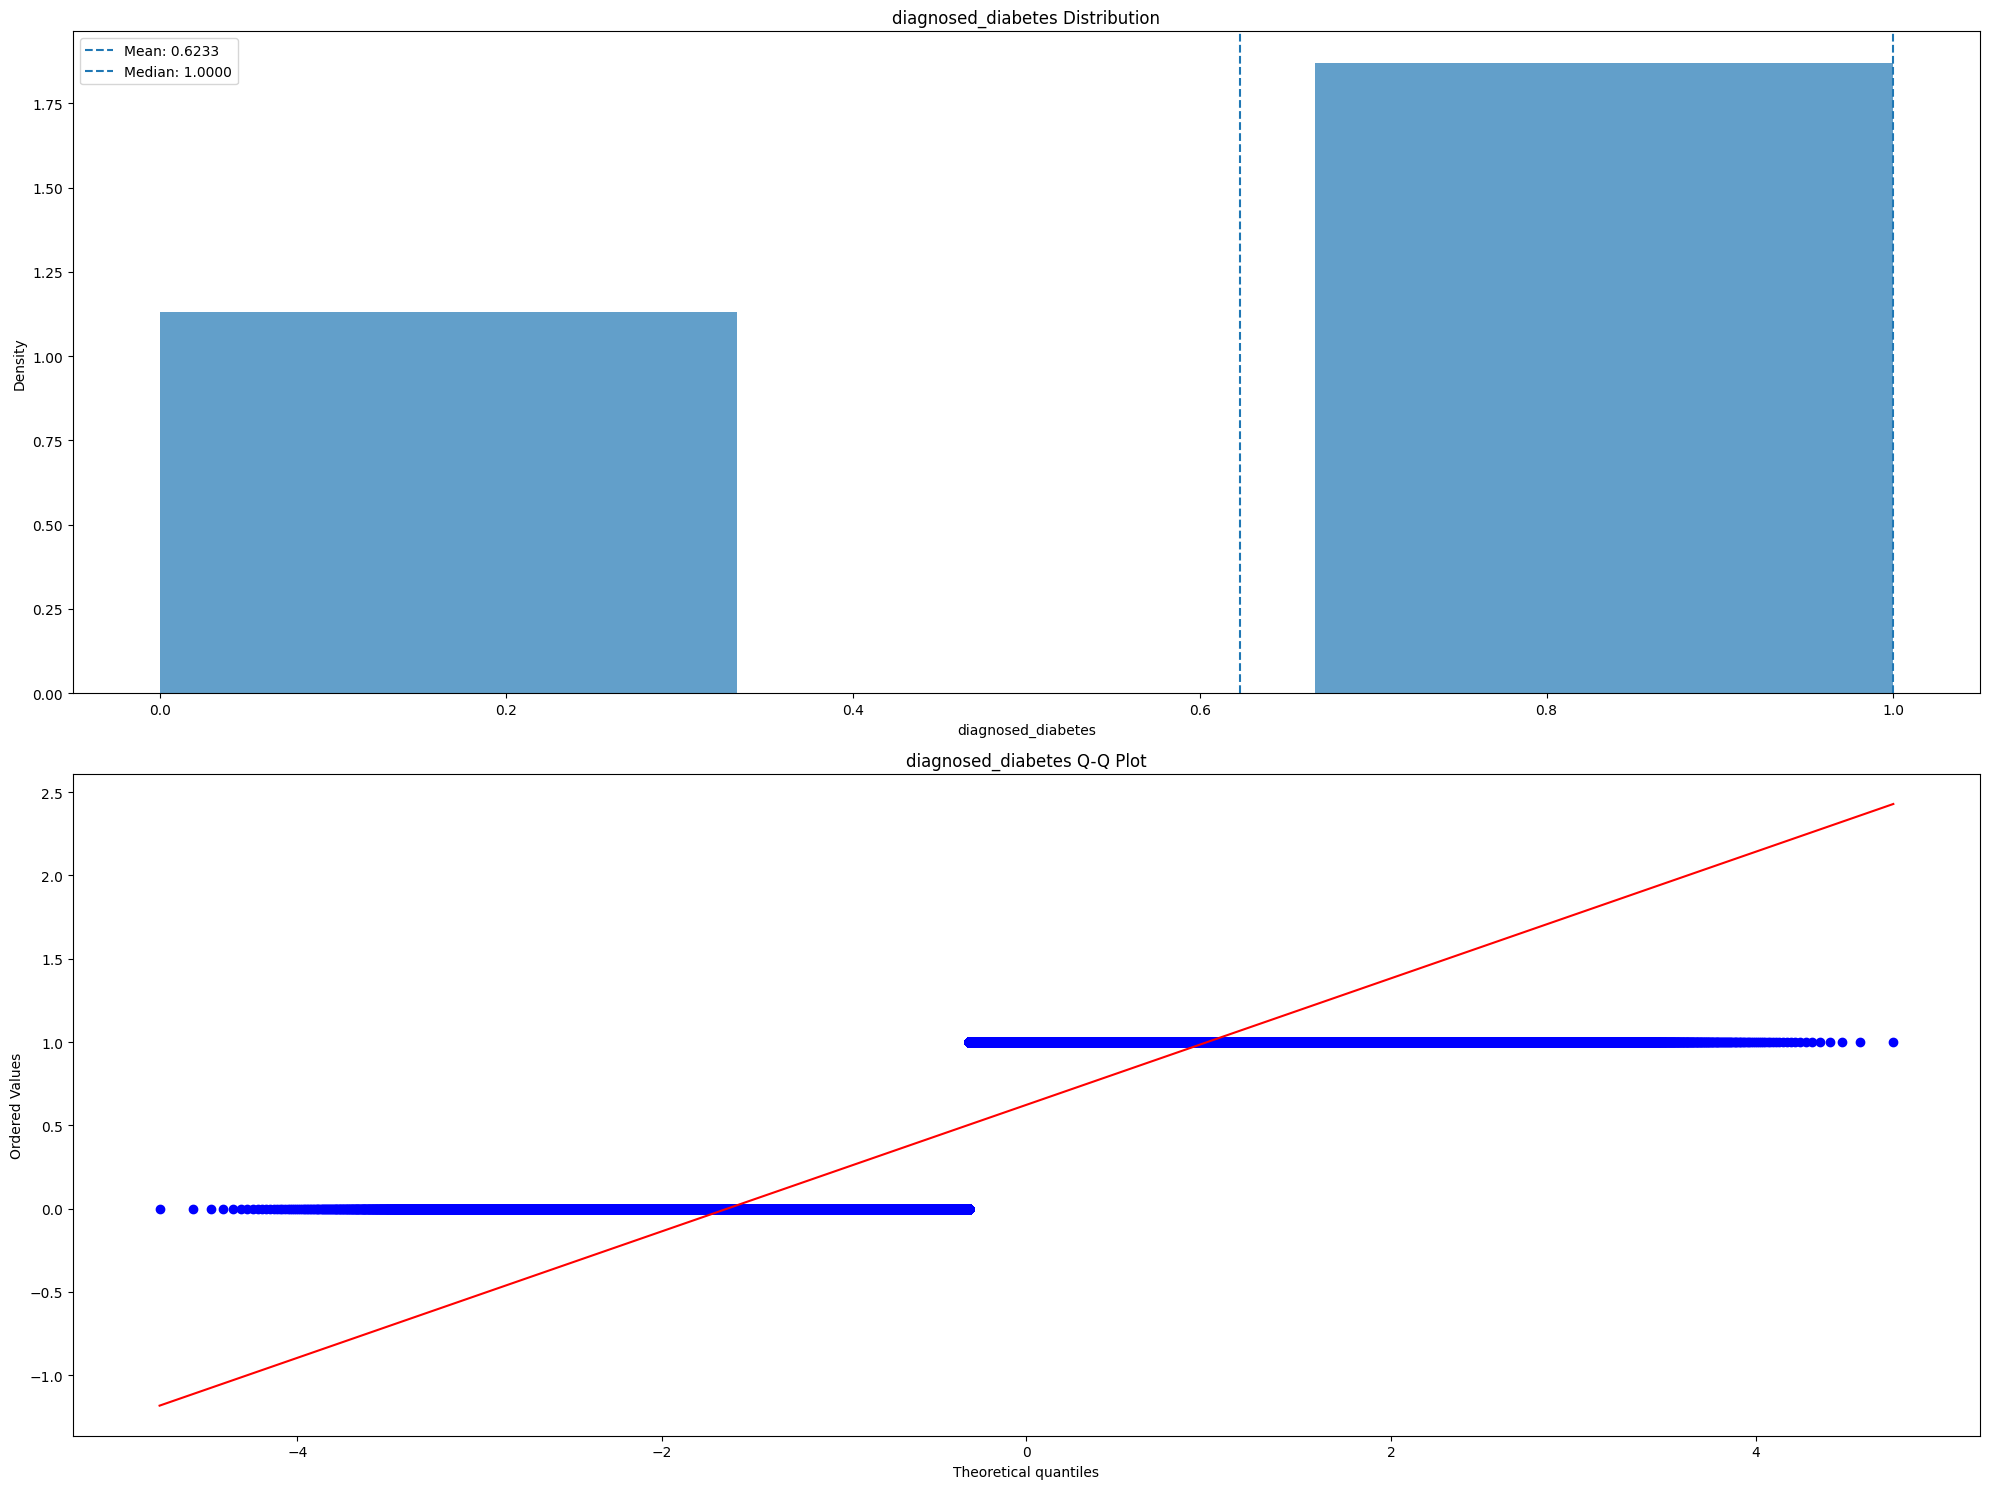

In [120]:
target_analysis = analyze_target_variable(train)

# Feature Distribution Analysis

In [124]:
train_without_target = train.drop(columns=['diagnosed_diabetes'])
train_without_target.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,102,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,124,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,108,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,123,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,124,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0


In [126]:
train_without_target.shape

(700000, 25)

In [ ]:
req_cols = train_without_target.select_dtypes(include='object').columns.tolist()
train_without_target[req_cols].nunique()

gender               3
ethnicity            5
education_level      4
income_level         5
smoking_status       3
employment_status    4
dtype: int64

In [133]:
def analyze_numeric_distributions(
    df,
    numeric_cols=None,
    sample_size=None,
    show_kde=True,
    show_qq=True,
    show_log_transform=False,
    bins=40,
    figsize_per_plot=(6,4),
    dpi=100
):
    """
    Analyze distribution for numeric features.

    Args:
        df (pd.DataFrame): dataframe
        numeric_cols (list or None): list of numeric columns to analyze. If None auto-detects dtypes.
        sample_size (int or None): if provided, limit columns to the first N
        show_kde (bool): overlay KDE on histogram
        show_qq (bool): include Q-Q plot for normality check
        show_log_transform (bool): also show histogram of log1p(value) for skewed vars
        bins (int): histogram bins
        figsize_per_plot (tuple): size per single axis (w,h)
        dpi (int): figure dpi
    """
    # 1) select numeric columns
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    else:
        # ensure columns exist
        numeric_cols = [c for c in numeric_cols if c in df.columns]

    if sample_size is not None:
        numeric_cols = numeric_cols[:sample_size]

    if not numeric_cols:
        print("No numeric columns found or provided.")
        return

    for col in numeric_cols:
        data = df[col].dropna()
        if data.size == 0:
            print(f"\n{col}: no non-null values — skipped.")
            continue

        # Print summary stats
        print(f"\n=== {col} ===")
        print(f"Count: {data.size:,}")
        print(f"Mean: {data.mean():.6f}")
        print(f"Std: {data.std():.6f}")
        print(f"Min: {data.min():.6f}")
        print(f"25%: {data.quantile(0.25):.6f}")
        print(f"50% (Median): {data.median():.6f}")
        print(f"75%: {data.quantile(0.75):.6f}")
        print(f"Max: {data.max():.6f}")
        print(f"Skewness: {data.skew():.6f}")
        print(f"Kurtosis: {data.kurtosis():.6f}")

        # layout: top: histogram (+kde), bottom-left: boxplot, bottom-right: Q-Q (optional)
        ncols = 2 if show_qq else 1
        fig = plt.figure(figsize=(figsize_per_plot[0]*ncols, figsize_per_plot[1]*1.8), dpi=dpi)
        gs = fig.add_gridspec(3, ncols, height_ratios=[2, 0.6, 0.6])

        # histogram (main)
        ax_hist = fig.add_subplot(gs[0, :])
        ax_hist.hist(data, bins=bins, alpha=0.7, density=False)
        if show_kde:
            try:
                kde_x = np.linspace(data.min(), data.max(), 200)
                kde_vals = stats.gaussian_kde(data)(kde_x)
                # scale KDE to match histogram counts approx by multiplying with len(data)*(bin_width)
                bin_width = (data.max() - data.min()) / bins if data.max() != data.min() else 1.0
                ax_hist.plot(kde_x, kde_vals * data.size * bin_width, linestyle='-', linewidth=1)
            except Exception:
                pass

        ax_hist.axvline(data.mean(), color='red', linestyle='--', label=f"Mean: {data.mean():.3f}")
        ax_hist.axvline(data.median(), color='green', linestyle='--', label=f"Median: {data.median():.3f}")
        ax_hist.set_title(f"{col} — Histogram")
        ax_hist.set_xlabel(col)
        ax_hist.set_ylabel("Count")
        ax_hist.legend()

        # boxplot
        ax_box = fig.add_subplot(gs[1, 0])
        ax_box.boxplot(data, vert=False, widths=0.6, patch_artist=True)
        ax_box.set_title("Boxplot")
        ax_box.set_yticks([])

        # Q-Q plot (if requested)
        if show_qq:
            ax_qq = fig.add_subplot(gs[1, 1])
            stats.probplot(data, dist="norm", plot=ax_qq)
            ax_qq.set_title("Q-Q plot")

        # Optional: log1p transformed histogram for skewed data
        if show_log_transform:
            log_data = np.log1p(data[data > -1])  # protect negative values: log1p only if >= -1
            ax_log = fig.add_subplot(gs[2, :])
            ax_log.hist(log_data.dropna(), bins=bins, alpha=0.7)
            ax_log.set_title("Log1p transformed histogram (useful for right skew)")
            ax_log.set_xlabel(f"log1p({col})")

        plt.tight_layout()
        plt.show()

# ---------------------------
# Example usage:
# ---------------------------
# analyze_numeric_distributions(df)                       # auto-detect numeric columns
# analyze_numeric_distributions(df, numeric_cols=['age','bmi'], show_log_transform=True, sample_size=5)



=== id ===
Count: 700,000
Mean: 349999.500000
Std: 202072.738554
Min: 0.000000
25%: 174999.750000
50% (Median): 349999.500000
75%: 524999.250000
Max: 699999.000000
Skewness: -0.000000
Kurtosis: -1.200000


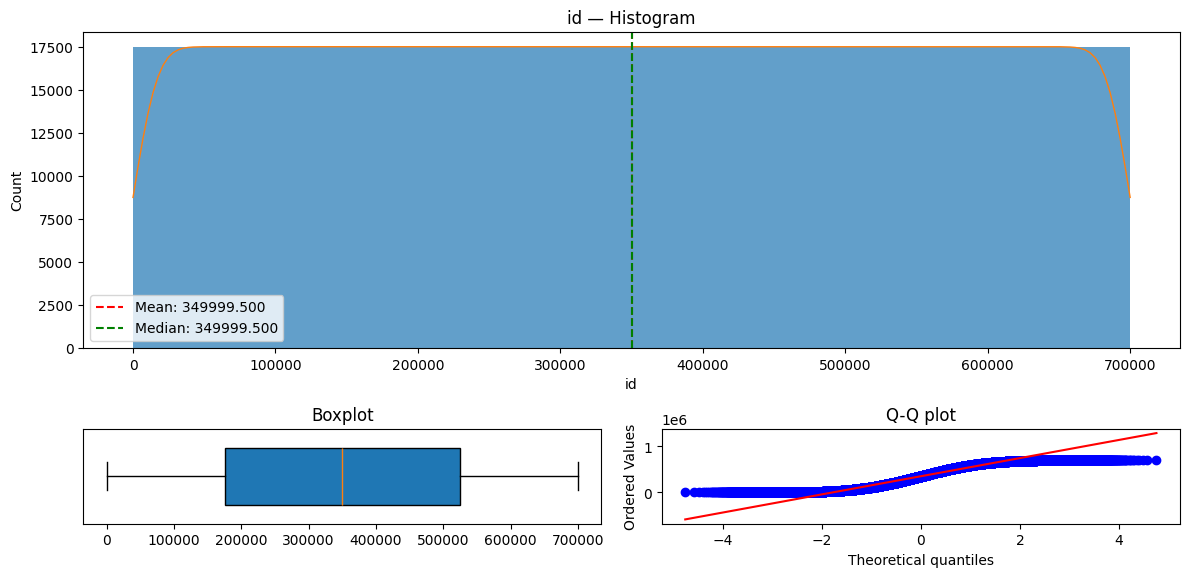


=== age ===
Count: 700,000
Mean: 50.359734
Std: 11.655520
Min: 19.000000
25%: 42.000000
50% (Median): 50.000000
75%: 58.000000
Max: 89.000000
Skewness: 0.020905
Kurtosis: -0.386740


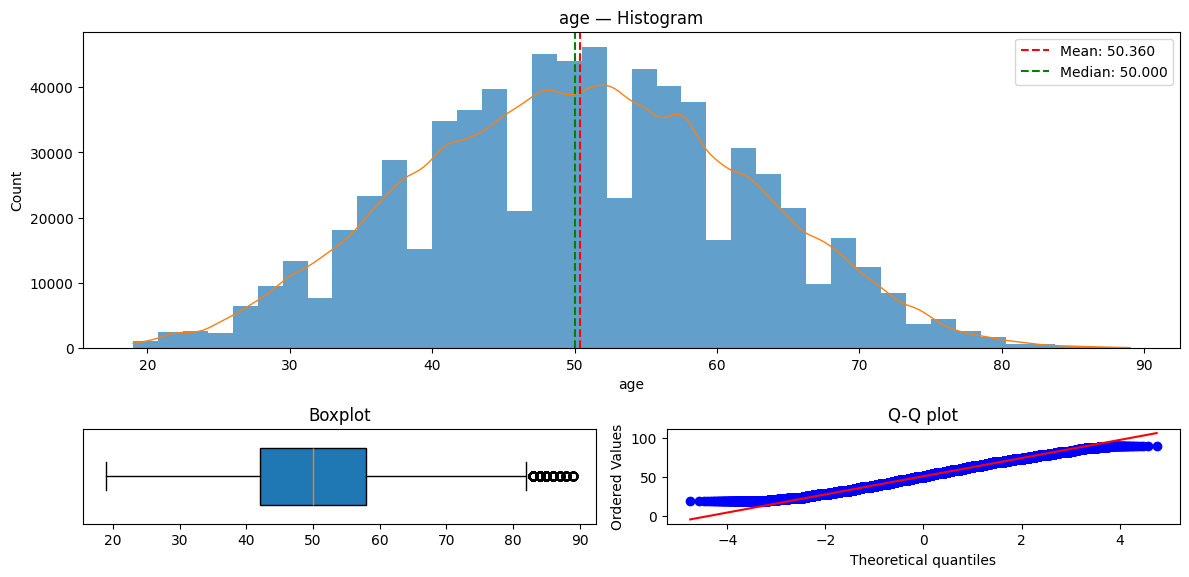


=== alcohol_consumption_per_week ===
Count: 700,000
Mean: 2.072411
Std: 1.048189
Min: 1.000000
25%: 1.000000
50% (Median): 2.000000
75%: 3.000000
Max: 9.000000
Skewness: 0.932375
Kurtosis: 0.704179


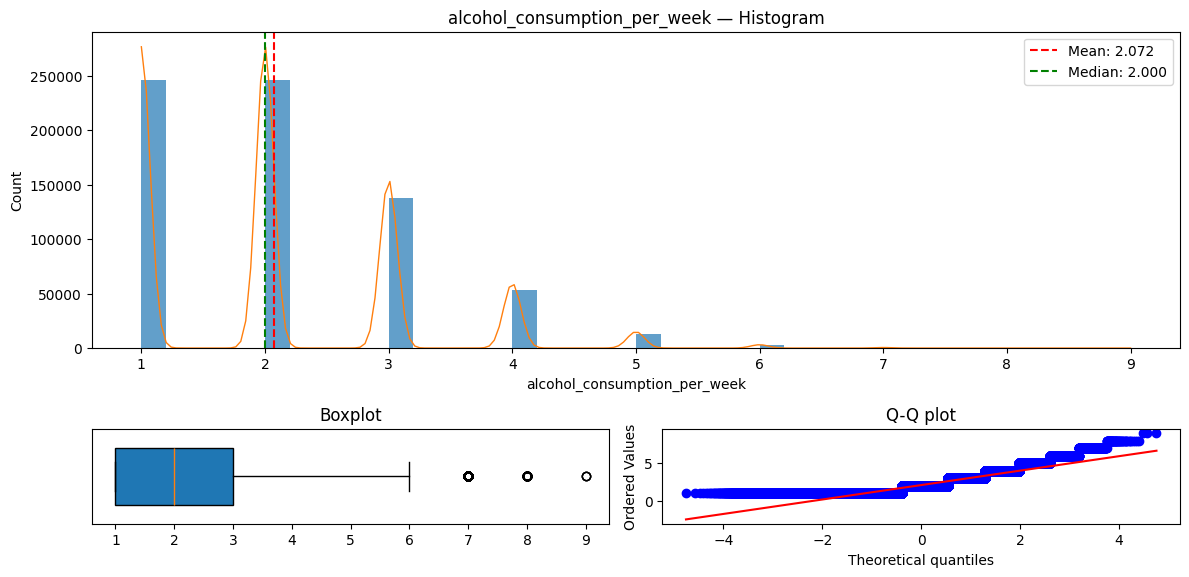


=== physical_activity_minutes_per_week ===
Count: 700,000
Mean: 80.230803
Std: 51.195071
Min: 1.000000
25%: 49.000000
50% (Median): 71.000000
75%: 96.000000
Max: 747.000000
Skewness: 2.814197
Kurtosis: 13.197071


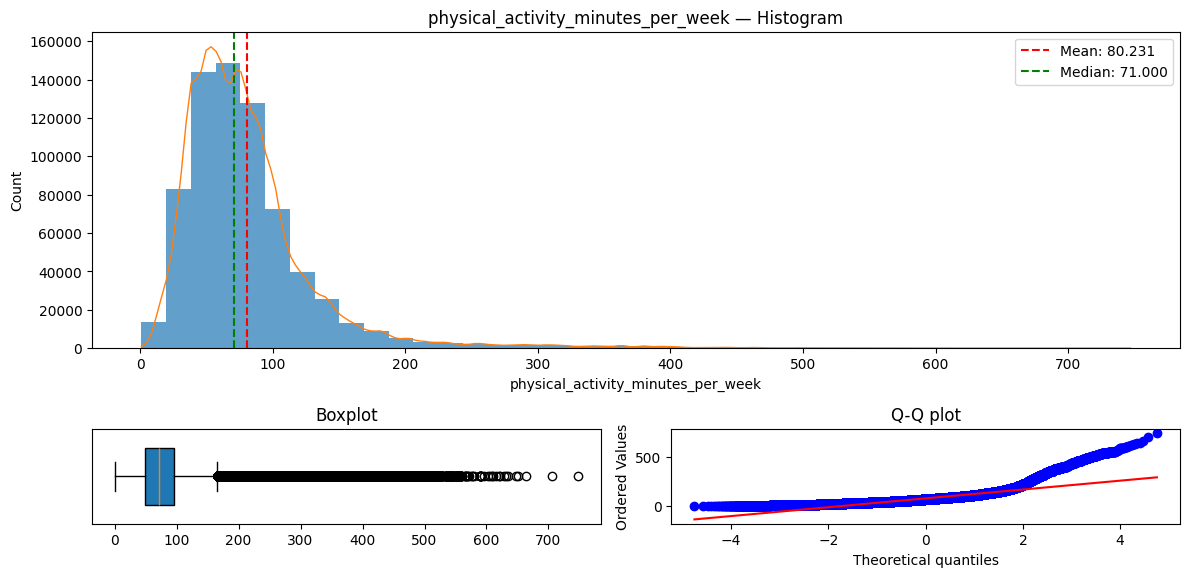


=== diet_score ===
Count: 700,000
Mean: 5.963695
Std: 1.463336
Min: 0.100000
25%: 5.000000
50% (Median): 6.000000
75%: 7.000000
Max: 9.900000
Skewness: -0.062970
Kurtosis: -0.161252


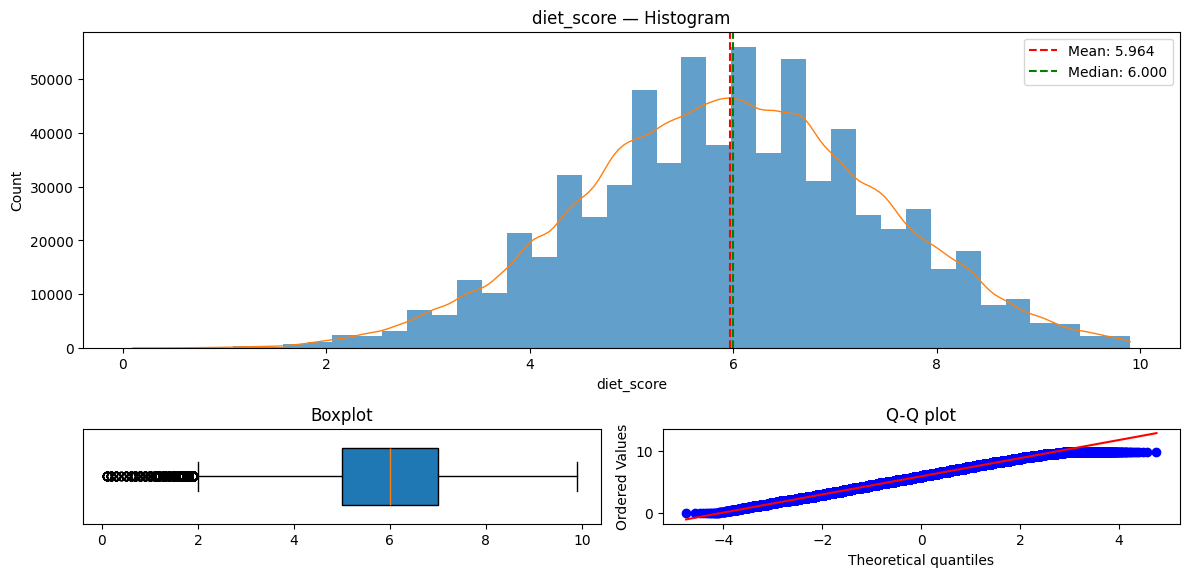


=== sleep_hours_per_day ===
Count: 700,000
Mean: 7.002200
Std: 0.901907
Min: 3.100000
25%: 6.400000
50% (Median): 7.000000
75%: 7.600000
Max: 9.900000
Skewness: 0.001486
Kurtosis: -0.059950


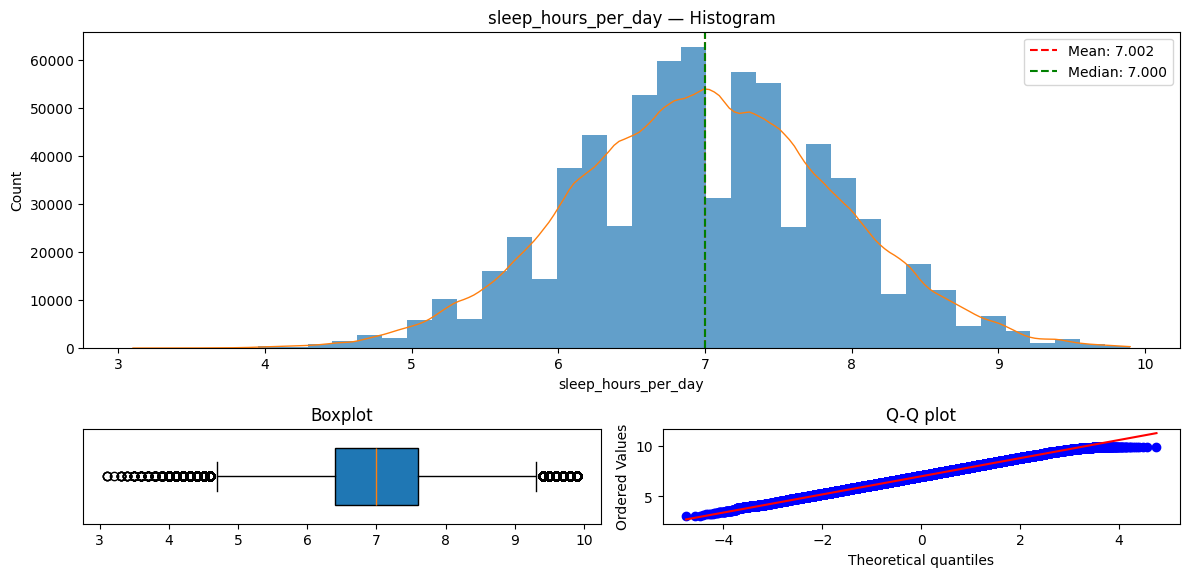


=== screen_time_hours_per_day ===
Count: 700,000
Mean: 6.012733
Std: 2.022707
Min: 0.600000
25%: 4.600000
50% (Median): 6.000000
75%: 7.400000
Max: 16.500000
Skewness: 0.114110
Kurtosis: -0.132787


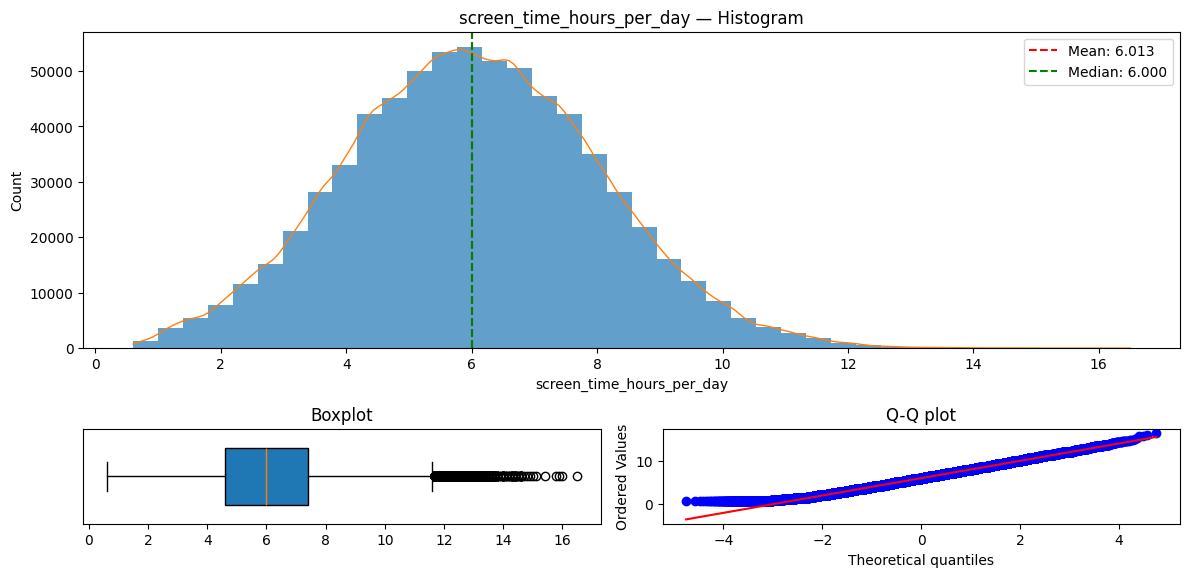


=== bmi ===
Count: 700,000
Mean: 25.874684
Std: 2.860705
Min: 15.100000
25%: 23.900000
50% (Median): 25.900000
75%: 27.800000
Max: 38.400000
Skewness: 0.032107
Kurtosis: -0.022284


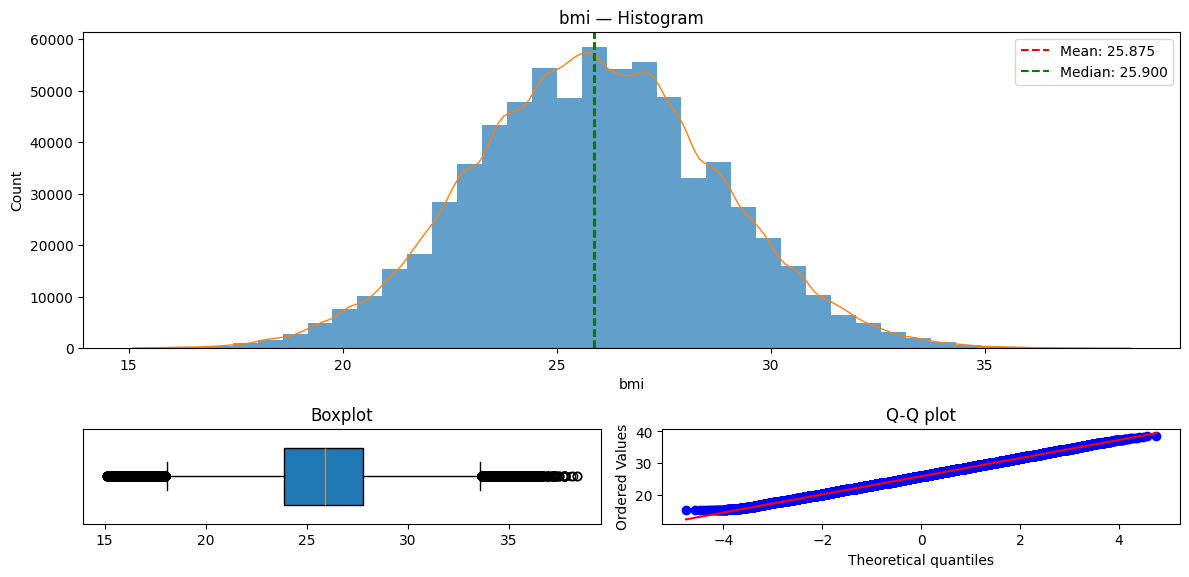


=== waist_to_hip_ratio ===
Count: 700,000
Mean: 0.858766
Std: 0.037980
Min: 0.680000
25%: 0.830000
50% (Median): 0.860000
75%: 0.880000
Max: 1.050000
Skewness: 0.037716
Kurtosis: 0.011097


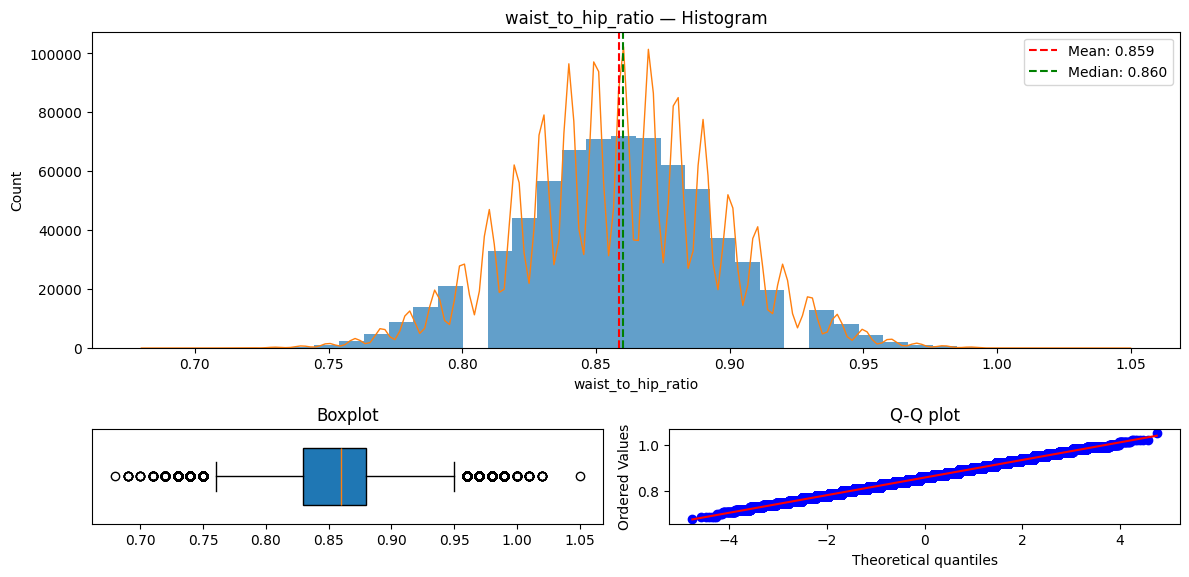


=== systolic_bp ===
Count: 700,000
Mean: 116.294193
Std: 11.010390
Min: 91.000000
25%: 108.000000
50% (Median): 116.000000
75%: 124.000000
Max: 163.000000
Skewness: 0.097208
Kurtosis: -0.393847


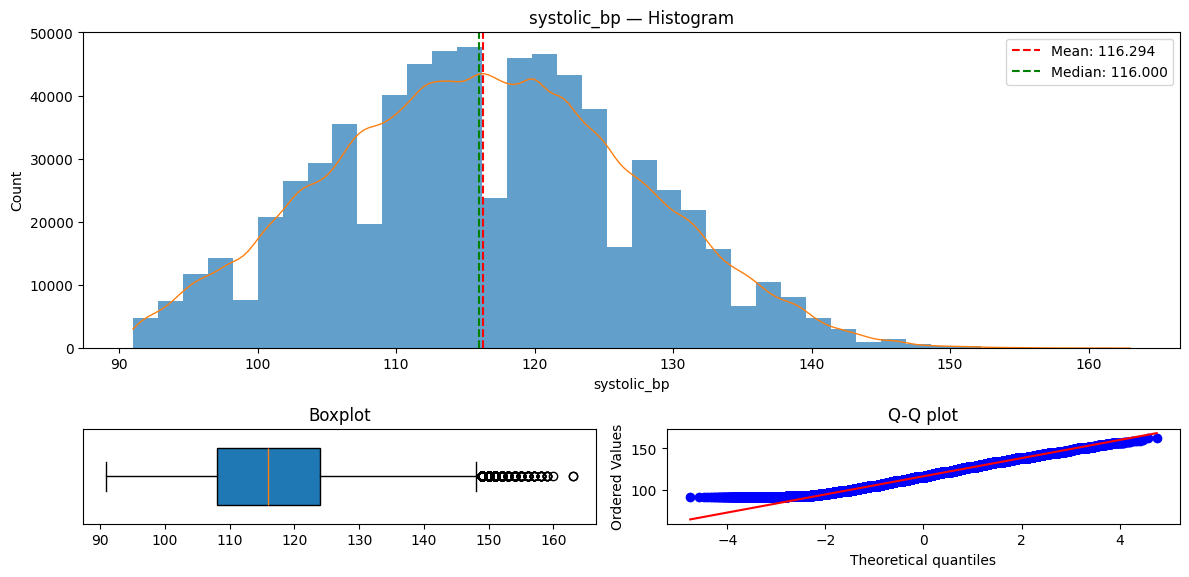


=== diastolic_bp ===
Count: 700,000
Mean: 75.440924
Std: 6.825775
Min: 51.000000
25%: 71.000000
50% (Median): 75.000000
75%: 80.000000
Max: 104.000000
Skewness: -0.001377
Kurtosis: -0.037275


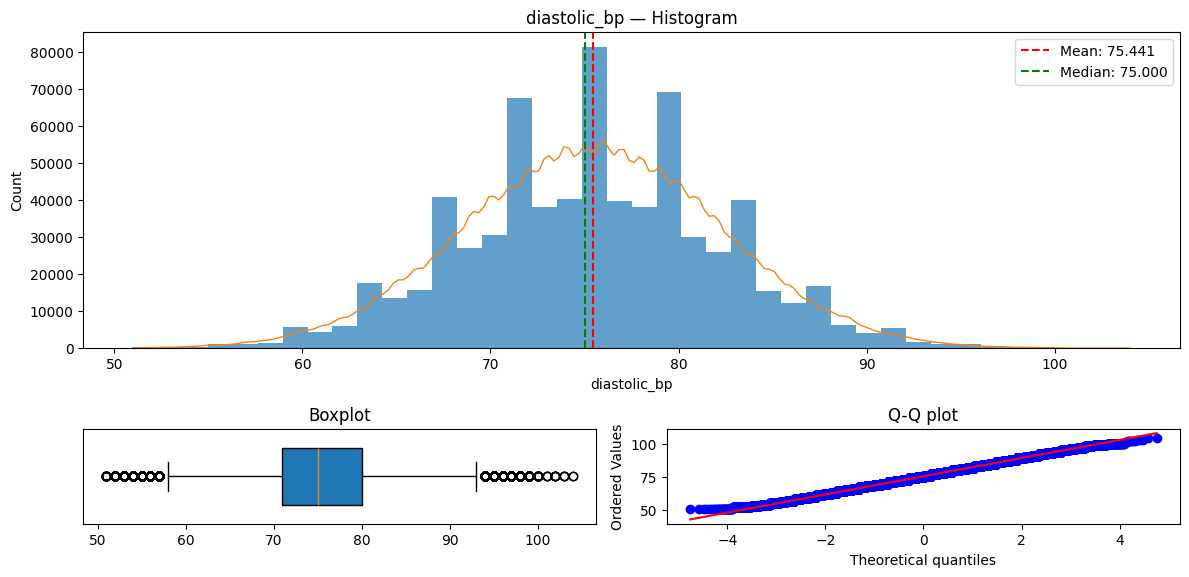


=== heart_rate ===
Count: 700,000
Mean: 70.167749
Std: 6.938722
Min: 42.000000
25%: 65.000000
50% (Median): 70.000000
75%: 75.000000
Max: 101.000000
Skewness: -0.012544
Kurtosis: -0.061064


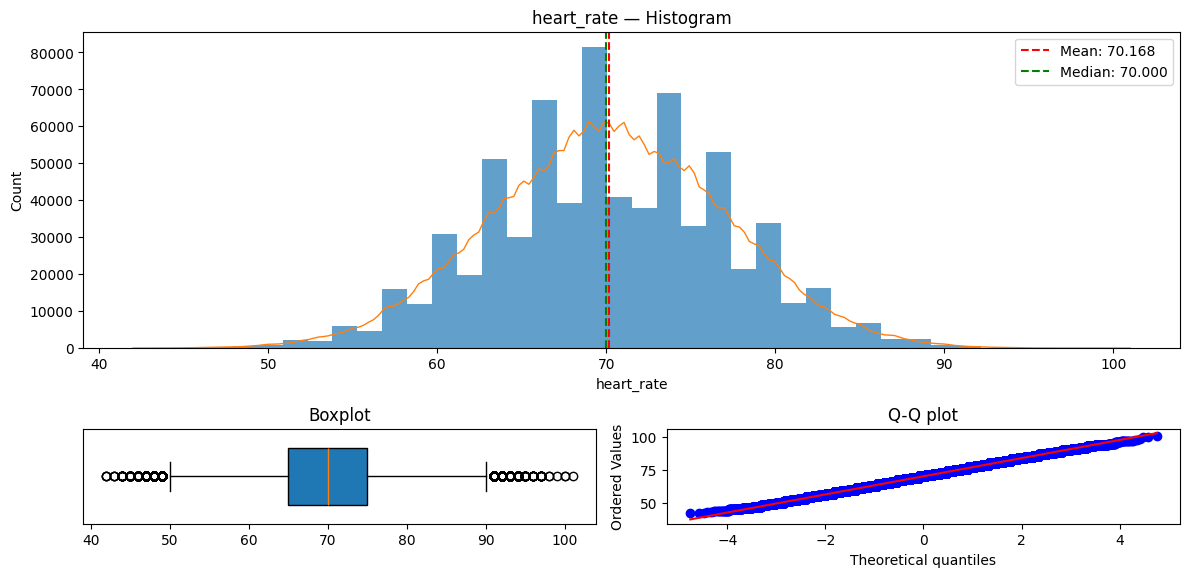


=== cholesterol_total ===
Count: 700,000
Mean: 186.818801
Std: 16.730832
Min: 117.000000
25%: 175.000000
50% (Median): 187.000000
75%: 199.000000
Max: 289.000000
Skewness: 0.061057
Kurtosis: -0.266343


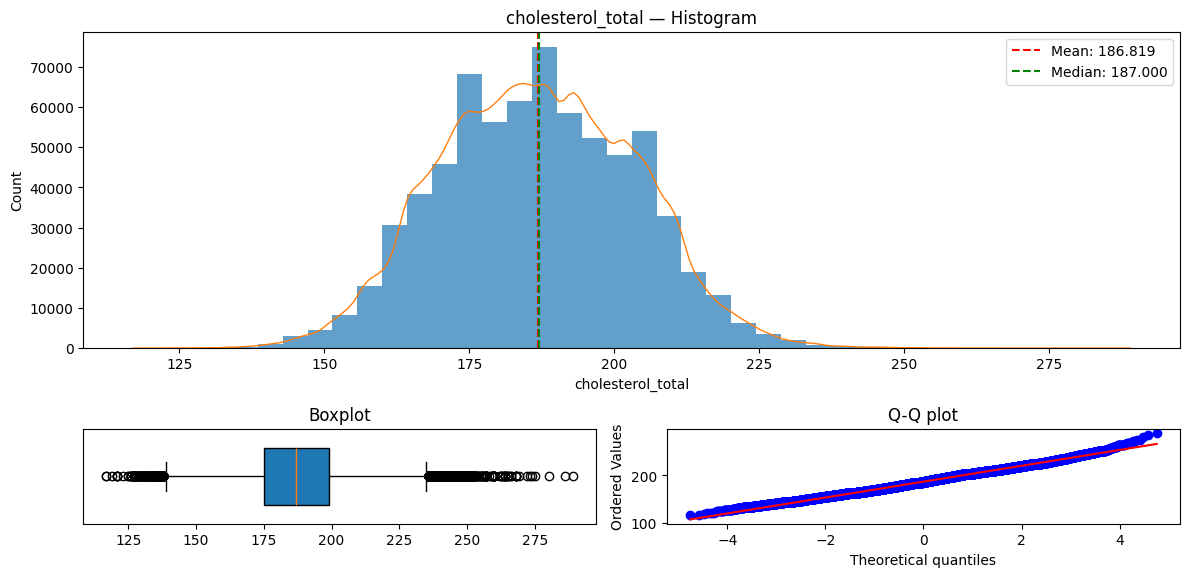


=== hdl_cholesterol ===
Count: 700,000
Mean: 53.823214
Std: 8.266545
Min: 21.000000
25%: 48.000000
50% (Median): 54.000000
75%: 59.000000
Max: 90.000000
Skewness: -0.021258
Kurtosis: -0.107150


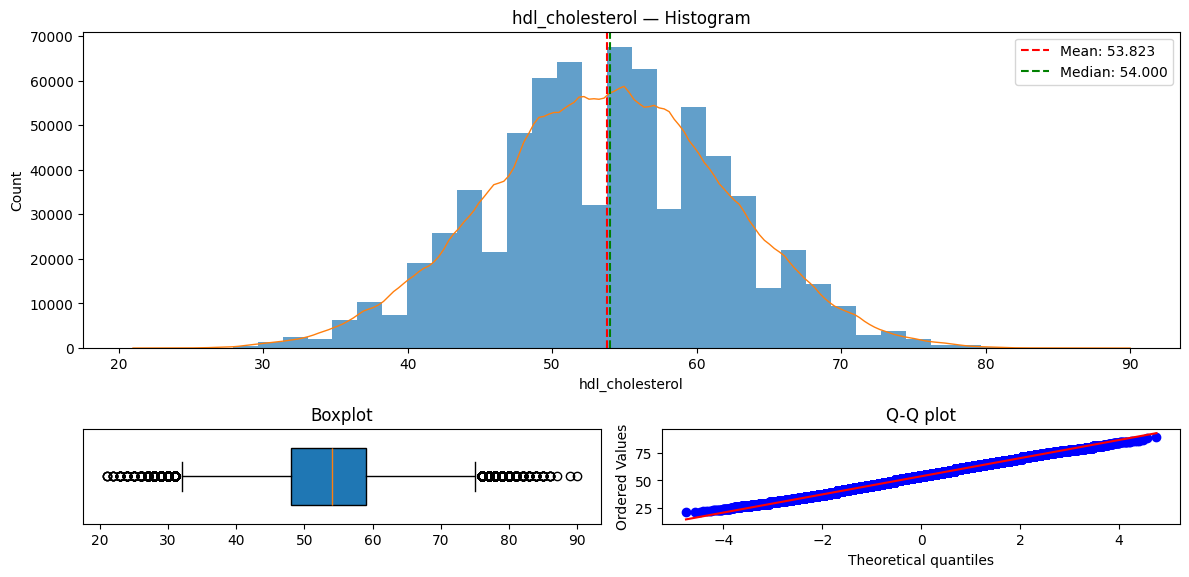


=== ldl_cholesterol ===
Count: 700,000
Mean: 102.905854
Std: 19.022416
Min: 51.000000
25%: 89.000000
50% (Median): 103.000000
75%: 116.000000
Max: 205.000000
Skewness: 0.132301
Kurtosis: -0.132099


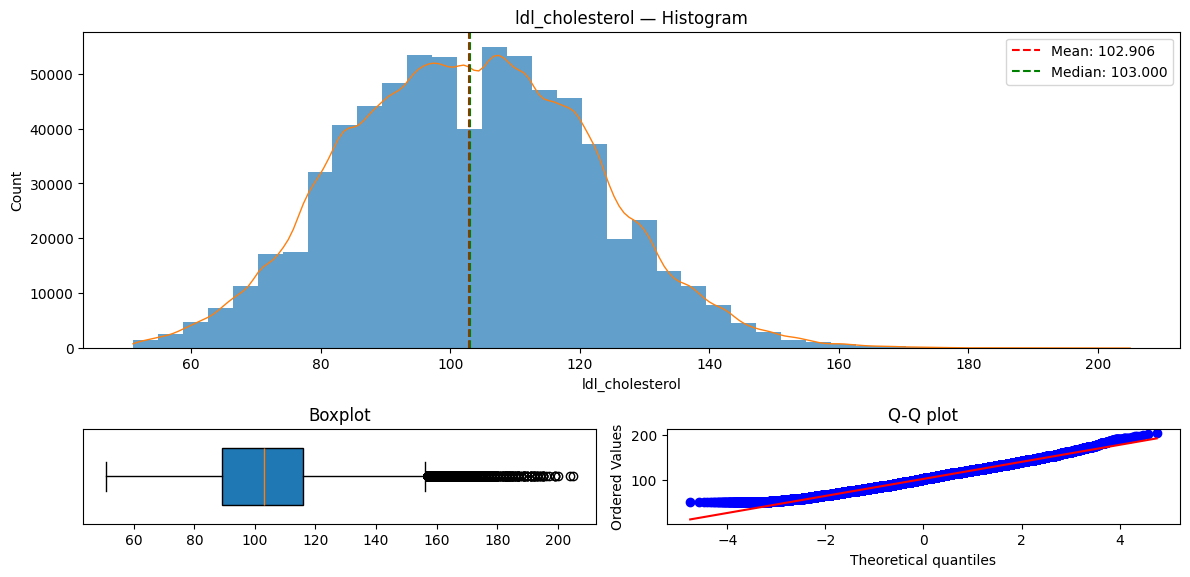


=== triglycerides ===
Count: 700,000
Mean: 123.081850
Std: 24.739397
Min: 31.000000
25%: 106.000000
50% (Median): 123.000000
75%: 139.000000
Max: 290.000000
Skewness: 0.192353
Kurtosis: 0.478312


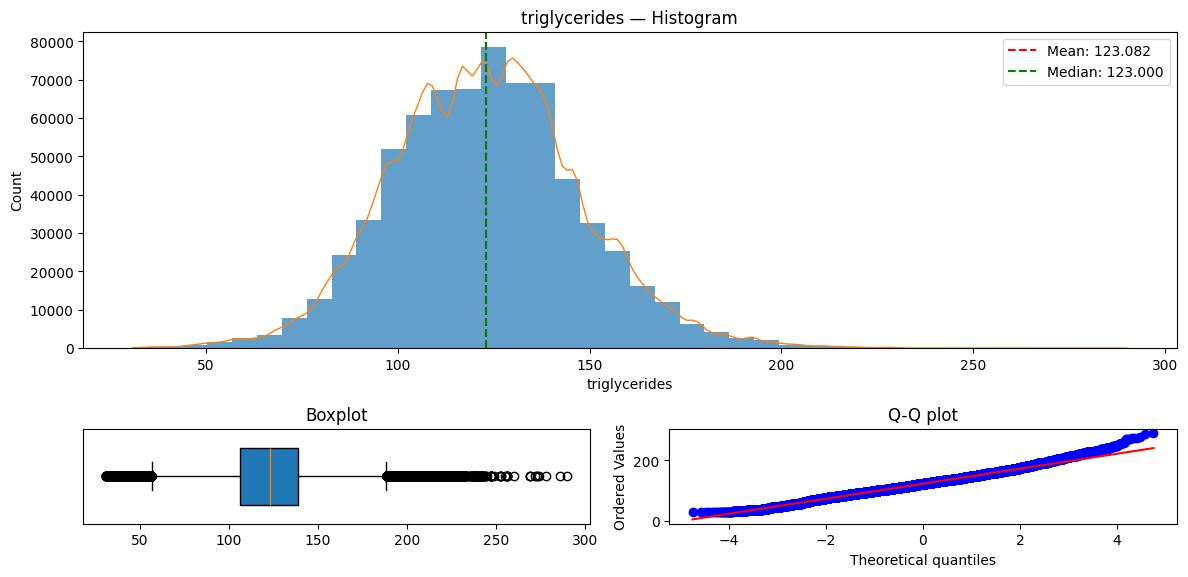


=== family_history_diabetes ===
Count: 700,000
Mean: 0.149401
Std: 0.356484
Min: 0.000000
25%: 0.000000
50% (Median): 0.000000
75%: 0.000000
Max: 1.000000
Skewness: 1.966986
Kurtosis: 1.869041


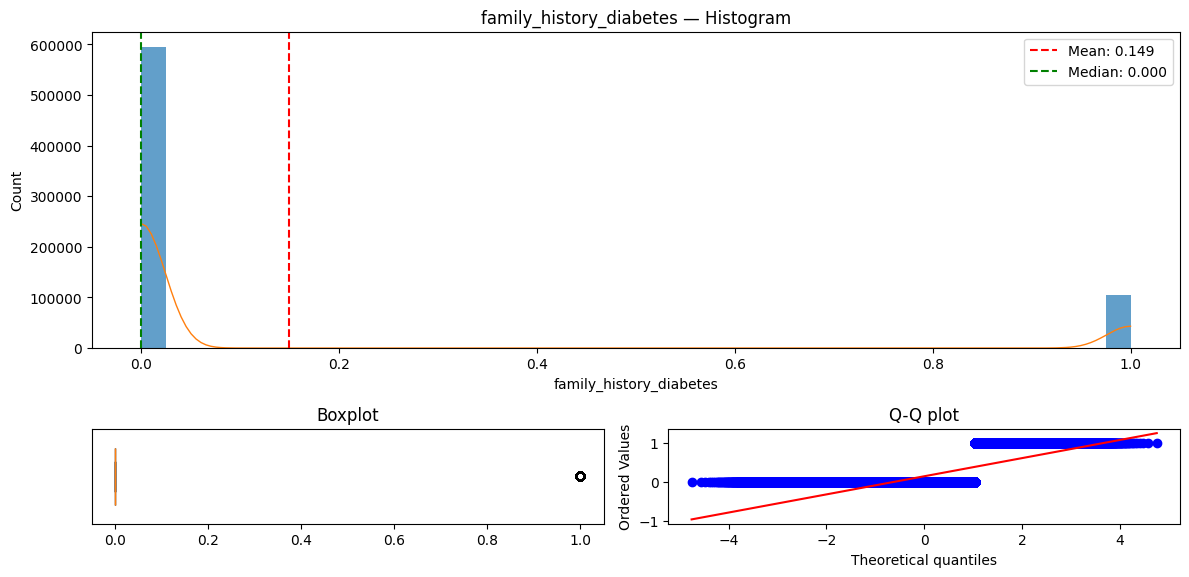


=== hypertension_history ===
Count: 700,000
Mean: 0.181990
Std: 0.385837
Min: 0.000000
25%: 0.000000
50% (Median): 0.000000
75%: 0.000000
Max: 1.000000
Skewness: 1.648423
Kurtosis: 0.717300


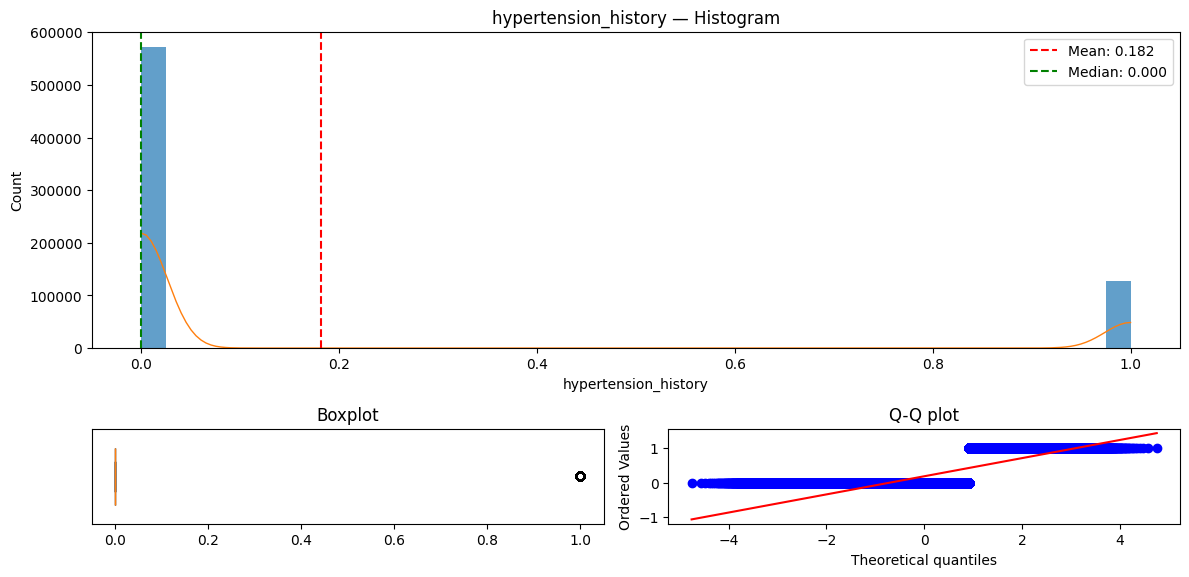


=== cardiovascular_history ===
Count: 700,000
Mean: 0.030324
Std: 0.171478
Min: 0.000000
25%: 0.000000
50% (Median): 0.000000
75%: 0.000000
Max: 1.000000
Skewness: 5.477980
Kurtosis: 28.008350


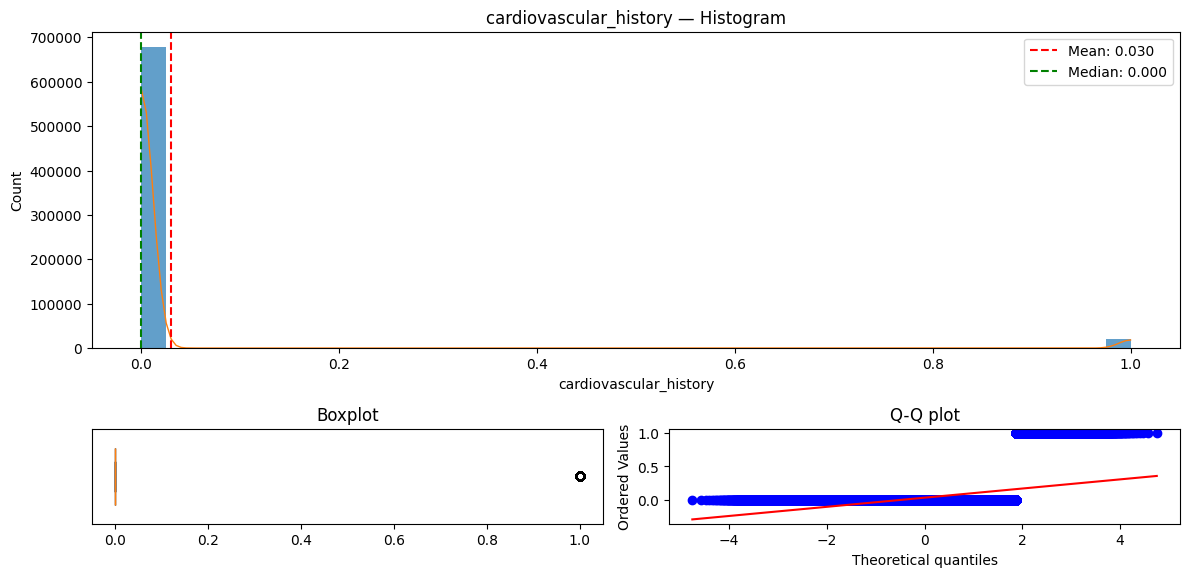

In [134]:
analyze_numeric_distributions(train_without_target)